In [1]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf

In [2]:
#load the saved model 
json_file = open('NN_18-12-5.json', 'r')
loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights("NN_18-12-5_weights.h5")

In [3]:
#load test data
path = 'x:/Steering/Recordings/Processed/'
testX = np.load(path + 'TestX_NN_18-12-5.npy')
testY = np.load(path + 'TestY_NN_18-12-5.npy')
one_hot_test = np.load(path + 'OneHot_testY_18-12-5.npy')

In [4]:
testY

array([3, 3, 3, ..., 1, 3, 1], dtype=int64)

In [5]:
loaded_model.compile(loss='mean_squared_error',
    optimizer='Adam',
           metrics=['categorical_accuracy'])

In [6]:
loaded_model.evaluate(testX,one_hot_test,verbose=1)

212005/212005 [==============================] - 3s 13us/step


[0.11801784523976237, 0.5273696375088305]

In [7]:
#process weights
weights_first_layer = loaded_model.layers[0].get_weights()[0]
biases_first_layer = loaded_model.layers[0].get_weights()[1]

weights_second_layer = loaded_model.layers[1].get_weights()[0]
biases_second_layer = loaded_model.layers[1].get_weights()[1]


In [8]:
weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])


In [9]:
weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / abs(biases_second_layer).max()


In [10]:
weights_first_layer_norm.shape, weights_second_layer_norm.shape

((19, 12), (13, 5))

In [11]:
abs(weights_first_layer).max(), abs(weights_second_layer).max()

(201.3652, 12.272079)

In [12]:
np.savetxt('weights_first_layer_norm_NN_18-12-5.txt',weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_18-12-5.txt',weights_second_layer_norm,delimiter= ',')


In [13]:
#plot confusion matrix 
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(testY,loaded_model.predict_classes(testX))

In [14]:
cfm_norm = np.zeros((5,5))#[[0 for x in range(5)] for y in range(5)]
for idx in range(5):
    cfm_norm[idx,:] = cfm[idx,:] / sum(cfm[idx,:]) #len(testY[testY == idx + 1])      
cfm_norm = np.around(cfm_norm,decimals=3)

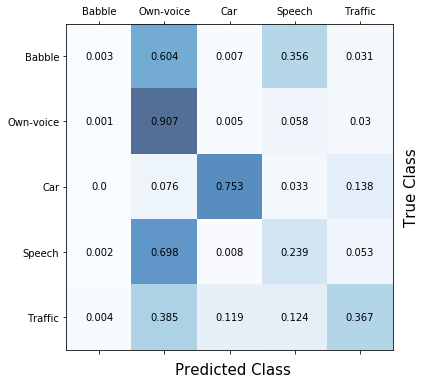

In [15]:
#nicer confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center')

ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.set_yticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.yaxis.set_label_coords(1.08,0.5)
ax.xaxis.set_label_coords(0.51,-0.04)
ax.set_xlabel('Predicted Class',fontsize=15)
ax.set_ylabel('True Class',fontsize=15)
fig.savefig('Conf_Matrix_left_ERB=2.png',dpi=100)


In [16]:
FP = cfm_norm.sum(axis=0) - np.diag(cfm_norm)  
FN = cfm_norm.sum(axis=1) - np.diag(cfm_norm)
TP = np.diag(cfm_norm)
TN = cfm_norm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [17]:
ACC.mean(),TPR.mean(), FPR.mean()

(0.781483703259348, 0.45369165529165534, 0.13658483036662122)